In [4]:
import json
import matplotlib.pyplot as plt

In [2]:
path = "./bart-large-cnn-finetuned/checkpoint-10650/trainer_state.json"

In [6]:
with open(path) as f:
    trainer_state = json.load(f)

In [9]:
trainer_state["log_history"][0]

{'epoch': 0.0, 'learning_rate': 0.0, 'loss': 2.9533, 'step': 1}

In [13]:
train_loss = []
steps = []
eval_loss = []
r1 = []
r2 = []
rL = []
eval_steps = []
for item in trainer_state["log_history"]:
    print(item)
    if item.get('loss'):
        train_loss.append(item["loss"])
        steps.append(item["step"])
    else:
        eval_loss.append(item["eval_loss"])
        r1.append(item["eval_rouge1"])
        r2.append(item["eval_rouge2"])
        rL.append(item["eval_rougeL"])
        eval_steps.append(item['step'])

{'epoch': 0.0, 'learning_rate': 0.0, 'loss': 2.9533, 'step': 1}
{'epoch': 0.0, 'learning_rate': 1.2000000000000002e-07, 'loss': 3.3797, 'step': 5}
{'epoch': 0.01, 'learning_rate': 3.2e-07, 'loss': 2.9857, 'step': 10}
{'epoch': 0.01, 'learning_rate': 5.2e-07, 'loss': 2.5684, 'step': 15}
{'epoch': 0.02, 'learning_rate': 6.800000000000001e-07, 'loss': 2.7075, 'step': 20}
{'epoch': 0.02, 'learning_rate': 8.400000000000001e-07, 'loss': 3.0063, 'step': 25}
{'epoch': 0.03, 'learning_rate': 1.04e-06, 'loss': 3.1426, 'step': 30}
{'epoch': 0.03, 'learning_rate': 1.2400000000000002e-06, 'loss': 2.4778, 'step': 35}
{'epoch': 0.03, 'learning_rate': 1.44e-06, 'loss': 2.6118, 'step': 40}
{'epoch': 0.04, 'learning_rate': 1.6400000000000002e-06, 'loss': 2.6688, 'step': 45}
{'epoch': 0.04, 'learning_rate': 1.8400000000000002e-06, 'loss': 2.5752, 'step': 50}
{'epoch': 0.05, 'learning_rate': 2.04e-06, 'loss': 2.6302, 'step': 55}
{'epoch': 0.05, 'learning_rate': 2.24e-06, 'loss': 2.5559, 'step': 60}
{'epoc

In [27]:
import numpy as np

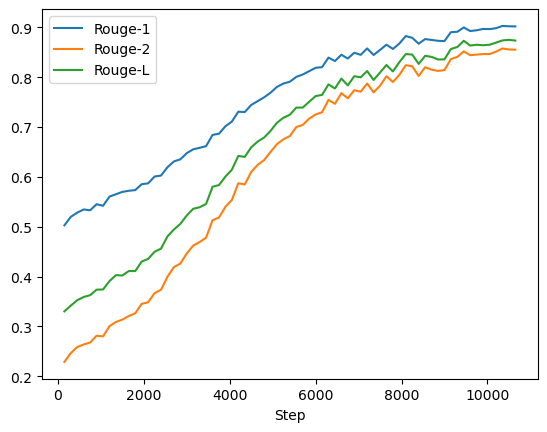

In [29]:
plt.plot(eval_steps, np.array(r1)/100, label="Rouge-1")
plt.plot(eval_steps, np.array(r2)/100, label="Rouge-2")
plt.plot(eval_steps, np.array(rL)/100, label="Rouge-L")
plt.xlabel("Step")
plt.legend()
plt.savefig("rouge")
plt.show()

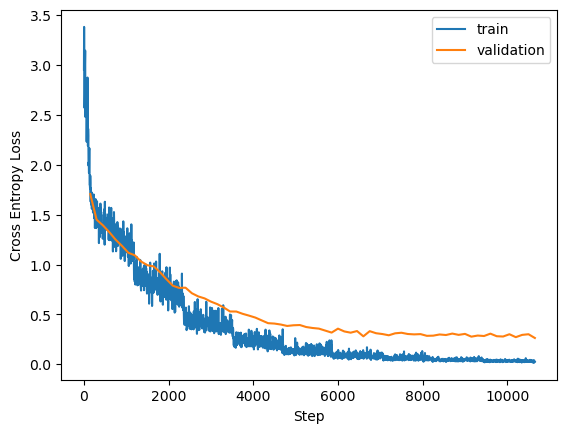

In [20]:
plt.plot(steps, train_loss, label="train")
plt.plot(eval_steps, eval_loss, label="validation")
plt.legend()
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Step")
# plt.yscale('log')
plt.savefig("train_val_loss")
plt.show()